In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


In [3]:
df=pd.read_csv("covid19_Confirmed_dataset.csv")
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [4]:
df.shape

(266, 104)

In [5]:
df.drop(["Lat","Long"],axis=1,inplace=True)

In [6]:
df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [7]:
aggregating=df.groupby("Country/Region").sum()

In [8]:
aggregating.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [9]:
aggregating.shape

(187, 100)

Visualizing data related to a country for example China
visualization always helps for better understanding of our data. 

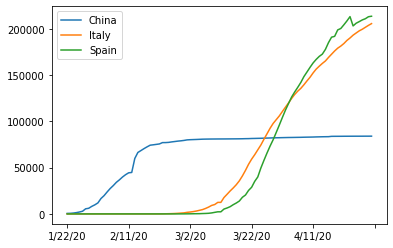

In [10]:
aggregating.loc["China"].plot()
aggregating.loc["Italy"].plot()
aggregating.loc["Spain"].plot()
plt.legend()

**Calculating a good measure
we need to find a good measure reperestend as a number, describing the spread of the virus in a country.**

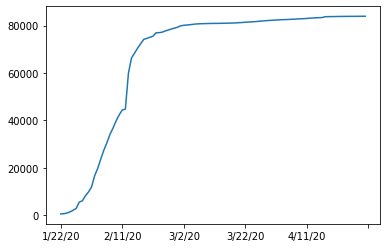

In [11]:
aggregating.loc['China'].plot()

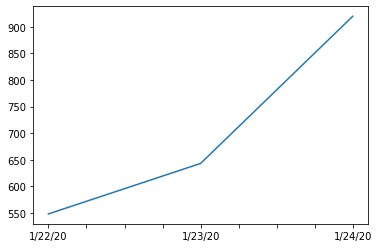

In [13]:
aggregating.loc['China'][:3].plot()

**caculating the first derivative of the curve**

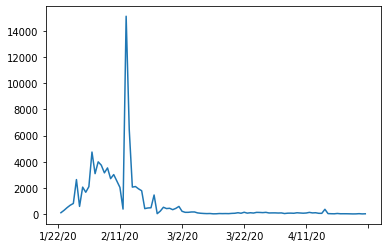

In [12]:
aggregating.loc['China'].diff().plot()

**find maxmimum infection rate for China**

In [14]:
aggregating.loc['China'].diff().max()

15136.0

In [15]:
aggregating.loc['Italy'].diff().max()

6557.0

In [16]:
aggregating.loc['Spain'].diff().max()

9630.0

In [18]:
aggregating.describe()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,...,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,1.870000e+02,1.870000e+02,1.870000e+02
mean,2.967914,3.497326,5.032086,7.668449,11.326203,15.652406,29.828877,32.973262,44.032086,53.085561,...,13630.058824,14032.657754,14479.903743,14945.609626,15399.839572,15793.411765,16159.395722,1.655103e+04,1.695136e+04,1.741629e+04
std,40.071697,47.017656,67.271230,102.808451,151.725366,210.370186,402.833903,445.097602,595.295516,716.748552,...,65623.450171,67699.951451,69854.512469,72292.085088,74690.260370,76709.121347,78404.913349,8.023629e+04,8.223124e+04,8.441412e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,67.000000,70.000000,75.000000,79.000000,80.000000,81.000000,81.000000,8.100000e+01,9.300000e+01,9.750000e+01
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,609.000000,634.000000,671.000000,681.000000,693.000000,696.000000,710.000000,7.120000e+02,7.290000e+02,7.460000e+02
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4081.500000,4242.500000,4422.500000,4785.000000,5070.000000,5397.500000,5708.500000,5.900000e+03,6.076000e+03,6.254500e+03
max,548.000000,643.000000,920.000000,1406.000000,2075.000000,2877.000000,5509.000000,6087.000000,8141.000000,9802.000000,...,811865.000000,840351.000000,869170.000000,905358.000000,938154.000000,965785.000000,988197.000000,1.012582e+06,1.039909e+06,1.069424e+06
